In [1]:
# needed packages
import numpy as np 
import matplotlib.pyplot as plt
import os
import shutil

In [2]:
# First take a look into a directory with data
path_to_data="../example_data/unsorted" #note: "/" instead of "\" used for paths by windows
all_files=os.listdir(path_to_data) 
print("number of files:")
print(len(all_files))
all_files

number of files:
27


['experiment_description.txt',
 'settingA_1440X_246.png',
 'settingA_1480X_243.png',
 'settingA_2780X_240.png',
 'settingA_3200X_237.png',
 'settingA_4500X_239.png',
 'settingA_5060X_236.png',
 'settingA_6190X_238.png',
 'settingA_6450X_241.png',
 'settingA_7450X_244.png',
 'settingA_8320X_235.png',
 'settingA_900X_245.png',
 'settingA_9470X_234.png',
 'settingA_9490X_242.png',
 'settingB_1080X_21.png',
 'settingB_1720X_13.png',
 'settingB_2120X_11.png',
 'settingB_2740X_12.png',
 'settingB_2880X_22.png',
 'settingB_3800X_18.png',
 'settingB_450X_20.png',
 'settingB_5100X_15.png',
 'settingB_5870X_17.png',
 'settingB_6790X_14.png',
 'settingB_9460X_19.png',
 'settingB_9530X_10.png',
 'settingB_9770X_16.png']

Per default the list of files is alphabetically ordered, but I don't care about settingA or settingB, 
also I don't care about the desription text-file. 
I just want the images in the order as I took them, and I want to write this order into the filename.
Additionally the number before "X" in the filename is the magnification from the microscope,
but instead I want to know the factor that transforms pixels to distances in nanometers. 
(I looked into the metadata of the measurement, to find out the corresponding distances for 5 images.)

Because I don't want to change the original data, in this script I will copy the images into a new folder in the directory of this script
and change the filenames to my wishes.

# Ordering the files chronologically

In [3]:
path_to_data+"/"+all_files[-1] # the full path of the last image

'Z:/Homes/Kernke_Robert/Public/PythonExample/unsorted/settingB_9770X_16.png'

In [4]:
# create a list with full paths of all images

full_paths_to_imgs=[] # initialize empty list
for i in range(len(all_files)): # loop over all found files
    if ".png" in all_files[i]: # filter out the .txt-file with this condition
        full_paths_to_imgs.append(path_to_data+"/"+all_files[i]) # add the full path to the list
    
full_paths_to_imgs[:3] # show only the first 3 paths, to check the result by eye

['Z:/Homes/Kernke_Robert/Public/PythonExample/unsorted/settingA_1440X_246.png',
 'Z:/Homes/Kernke_Robert/Public/PythonExample/unsorted/settingA_1480X_243.png',
 'Z:/Homes/Kernke_Robert/Public/PythonExample/unsorted/settingA_2780X_240.png']

In [5]:
os.path.getctime(full_paths_to_imgs[0]) # try out the function to obtain the creation date of a file

1696245744.241541

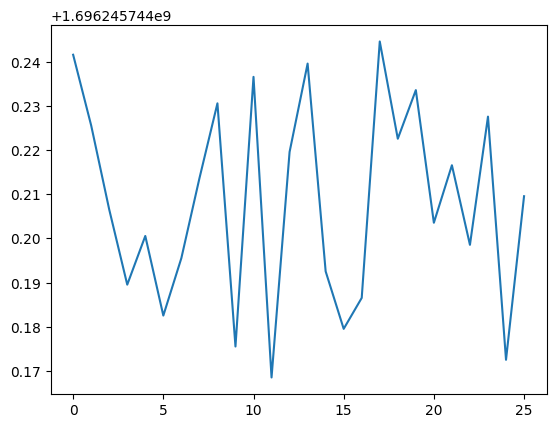

In [6]:
# create a with all creation dates

creation_dates=[]
for i in full_paths_to_imgs: # little difference to the previous loop: 
                             # i is not an index running from 0 up to the length of the list (like before)
                             # but instead iterates through  the elements of the list itself
    creation_dates.append(os.path.getctime(i))
    
plt.plot(creation_dates) # plotting shows the alphabetical order on the x-axis and the time of creation on the y-axis 

In [7]:
sortindex=np.argsort(creation_dates) # obtain the order of sorting by creation time
sorted_paths=[]
for i in sortindex:
    sorted_paths.append(full_paths_to_imgs[i])

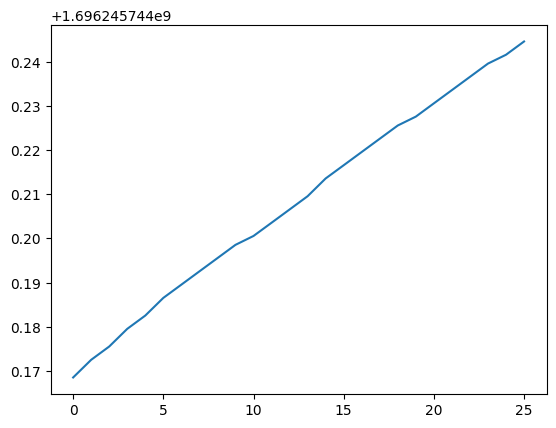

In [8]:
#same code as two cells above (In [6]) , just with different variable names to check the sorting

check_creation_dates=[]
for i in sorted_paths: 
    check_creation_dates.append(os.path.getctime(i))
    
plt.plot(check_creation_dates)

# Changing the filenames from magnifications to pixelsizes

In [9]:
# From metadata
magnifications=np.array([450,900,1080,1440,2880]) #magnification factor from filename
pixelsizes=np.array([0.11,0.055,0.046,0.034,0.017]) #corresponding pixelsize in microns

Relation: Magnification to Pixelsize
$$\frac{1}{P_{\mathrm{Pixelsize}}}=n+m\cdot M_{\mathrm{Magnification}}$$

In [10]:
# obtain the relation between magnification and 
inverse_pixelsizes=1/pixelsizes

p=np.polyfit(magnifications,inverse_pixelsizes,1)
print("linefit, polynomial first order: m * x + n ")
print("  m  ,  n  ")
print(p)

linefit, polynomial first order: m * x + n 
  m  ,  n  
[ 0.02050252 -0.22897264]


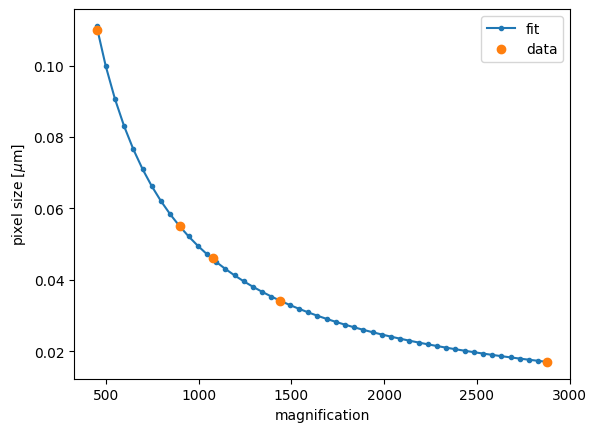

In [11]:
# plot the relation for visual checking
x=np.linspace(np.min(magnifications),np.max(magnifications),50) 
y=1/np.polyval(p,x)
plt.plot(x,y,marker='.',linestyle='-',label='fit')
plt.plot(magnifications,pixelsizes,marker='o',linestyle=' ',label='data')
plt.xlabel("magnification")
plt.ylabel("pixel size [$\mu$m]")
plt.legend()
plt.show()

In [12]:
# read magnification from filename and transfrom to pixelsize

# here first a single example is done and then the loop for all files follows
test=sorted_paths[0]
test

'Z:/Homes/Kernke_Robert/Public/PythonExample/unsorted/settingA_9470X_234.png'

In [13]:
index=test.find('X')
print(index)
test[:index]

66


'Z:/Homes/Kernke_Robert/Public/PythonExample/unsorted/settingA_9470'

In [14]:
test[:index][::-1] # invert the order

'0749_Agnittes/detrosnu/elpmaxEnohtyP/cilbuP/treboR_eknreK/semoH/:Z'

In [15]:
index2=test[:index][::-1].find('_')
index2

4

In [16]:
test[index-index2:index] # number is still a string

'9470'

In [17]:
int(test[index-index2:index]) # make string an integer

9470

In [18]:
pix=1/np.polyval(p,int(test[index-index2:index]))
print('pixelsize in micrometer '+str(pix))
print('pixelsize in nanometer '+str(pix*1000))
print('pixelsize in nanometer rounded '+str(np.round(pix*1000)))
print('pixelsize in nanometer rounded as integer '+str(int(np.round(pix*1000))))

pixelsize in micrometer 0.005156502458690968
pixelsize in nanometer 5.1565024586909685
pixelsize in nanometer rounded 5.0
pixelsize in nanometer rounded as integer 5


In [19]:
# filename should look like this example: img_1_pixelsize_23nm.png

new_filenames=[]
for i,fullpath in enumerate(sorted_paths):
    order_number=str(i)
    if len(order_number)<2: # insert 0 in front of single digit numbers to ensure ordering
        order_number="0"+order_number
    new_filename="img_"+order_number+"_pixelsize_"
    index=fullpath.find('X')
    index2=fullpath[:index][::-1].find('_')
    magnification=int(fullpath[index-index2:index])
    pixelsize_nanometer=1000/np.polyval(p,magnification)
    pixelsize_string=str(int(np.round(pixelsize_nanometer)))
    new_filename+=pixelsize_string+"nm.png"
    
    new_filenames.append(new_filename)

new_filenames[:3]

['img_00_pixelsize_5nm.png',
 'img_01_pixelsize_5nm.png',
 'img_02_pixelsize_6nm.png']

In [20]:
# create a new folder "sorted" in case it does not already exist in the directory of this script

new_folder='../example_data/sorted/'
if not os.path.exists(new_folder):
    os.mkdir(new_folder)

In [21]:
# actually execute the copying and renaming  
for i,fullpath in enumerate(sorted_paths):
    shutil.copy(fullpath,new_folder+new_filenames[i])

In [22]:
#check the result
os.listdir(new_folder) 

['img_00_pixelsize_5nm.png',
 'img_01_pixelsize_5nm.png',
 'img_02_pixelsize_6nm.png',
 'img_03_pixelsize_23nm.png',
 'img_04_pixelsize_10nm.png',
 'img_05_pixelsize_18nm.png',
 'img_06_pixelsize_15nm.png',
 'img_07_pixelsize_29nm.png',
 'img_08_pixelsize_8nm.png',
 'img_09_pixelsize_7nm.png',
 'img_10_pixelsize_11nm.png',
 'img_11_pixelsize_10nm.png',
 'img_12_pixelsize_18nm.png',
 'img_13_pixelsize_5nm.png',
 'img_14_pixelsize_8nm.png',
 'img_15_pixelsize_8nm.png',
 'img_16_pixelsize_5nm.png',
 'img_17_pixelsize_13nm.png',
 'img_18_pixelsize_33nm.png',
 'img_19_pixelsize_5nm.png',
 'img_20_pixelsize_7nm.png',
 'img_21_pixelsize_111nm.png',
 'img_22_pixelsize_55nm.png',
 'img_23_pixelsize_46nm.png',
 'img_24_pixelsize_34nm.png',
 'img_25_pixelsize_17nm.png']

In [3]:
#just for completeness, here the code that created the testdata
import cv2 # useful package for images installed via: pip install opencv-python

a=np.zeros([16,16]) # the images being small black squares
a=a.astype(np.uint8) # typical format for pixel values: unsigned integers up to 255

mag=[450,900,1080,1440,2880] # the 5 fixed magnifications, for which I know the conversion to pixel-distances
mags=np.random.randint(10,1000,21)*10 # more random magnifications
mags=mags.tolist() # transform to list, in order to merge the fixed and random values to one big list
mags +=mag # concatenate to lists via addition

# create a list containing the filenames
setting_names=["settingA","settingB"]
names=[]
counter1=234
counter2=10
for i in range(len(mags)):
    if i%2 == 0:
        names.append(setting_names[0]+"_"+str(mags[i])+"X_"+str(counter1)+".png")
        counter1+=1
    else:
        names.append(setting_names[1]+"_"+str(mags[i])+"X_"+str(counter2)+".png")
        counter2+=1
        
# create the images with their corresponding name
for i in range(len(names)):
    cv2.imwrite(path_to_data+'/'+names[i],a)        
    
# create a textfile
with open(path_to_data+'/'+'experiment_description.txt','w') as textfile:
    textfile.write("images from a measurement")